### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

#Importing DataCleaning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

#Importing Predictive Models 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform 


#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib


In [2]:
#Loading Dataset
avocado =  pd.read_csv("avocado.csv")
avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
#Dropping Unnecessary Column
avocado.drop('Unnamed: 0',axis=1,inplace = True)

In [4]:
print("Shape of our Dataset is",avocado.shape)

Shape of our Dataset is (18249, 13)


In [5]:
avocado.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

#### About Dataset


- Label : 
    - AveragePrice - the average price of a single avocado
    
    
- Predictors :
    - Date - The date of the observation
    - type - conventional or organic
    - year - the year
    - Region - the city or region of the observation
    - Total Volume - Total number of avocados sold
    - 4046 - Total number of avocados with PLU 4046 sold
    - 4225 - Total number of avocados with PLU 4225 sold
    - 4770 - Total number of avocados with PLU 4770 sold
    - Total Bags - Total number of avocado bags sold.
    - Small Bags - Total number of Small avocado bags sold.
    - Large Bags - Total number of Large avocado bags sold.
    - XLarge Bags - Total number of XLarge avocado bags sold.

In [6]:
#Analysing Datatypes and null values in our dataset. 
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


We've 10 numerical and 3 categorical variables in our dataset.

In [7]:
#Checking for Null Values
avocado.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

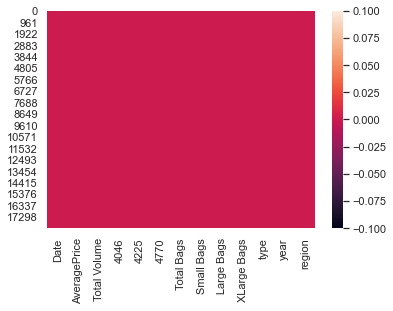

In [8]:
#Visualising null values
sns.heatmap(avocado.isna())

In [9]:
#Checking for duplicated fields or records.
avocado.duplicated().sum()

0

In [10]:
#Statistical description of dataset.
avocado.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

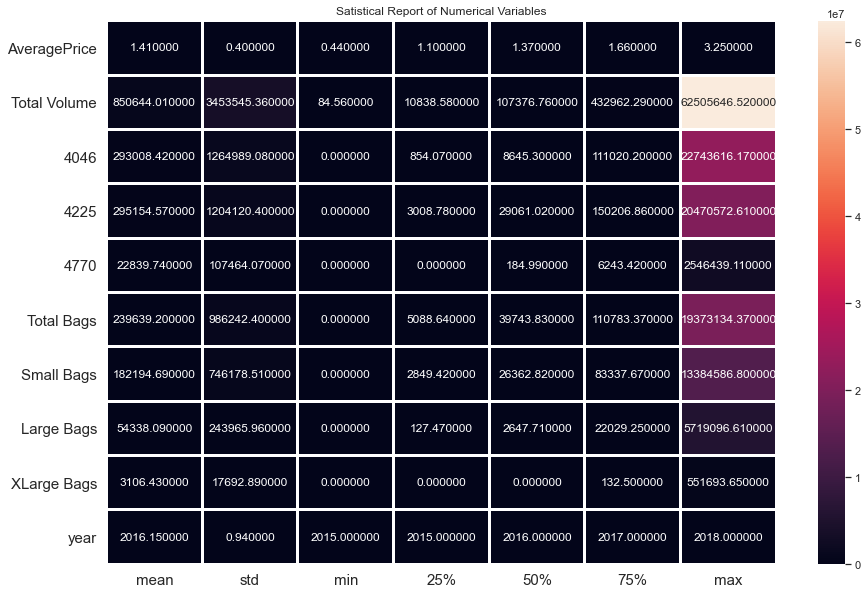

In [11]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(avocado.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

- Average Price:
    - mean : 1.41
    - std : 0.4
    - min : 0.44
    - max :3.25
    
- Total Volume:
    - mean : 850644.010
    - std : 3453545.36
    - min : 84.56
    - max : 62505646.520
    
- 4046:
    - mean : 293008.42
    - std : 1264989.08
    - min : 0
    - max : 2274366.17
    
- 4225:
    - mean : 295154.57
    - std : 1204120.4
    - min : 0
    - max : 20470572.61
    
- 4770:
    - mean : 22839.74
    - std : 107464.07
    - min : 0
    - max : 2546439.11
    
- Total Bags:
    - mean : 239639.2
    - std : 986242.4
    - min : 0
    - max : 19373134.37
    
- Small Bags:
    - mean : 182194.69
    - std : 746178.51
    - min : 0
    - max : 13384586.8
    
- Large Bags:
    - mean : 54338.09
    - std : 243965.96
    - min : 0
    - max : 5719096.61
    
- XLarge Bags:
    - mean : 3106.43
    - std : 17692.89
    - min : 0
    - max : 551693.65
    
- Year:
    - mean : 2016.15
    - std : 0.94
    - min : 2015
    - max : 2018

#### Univariate Analysis

<AxesSubplot:xlabel='year', ylabel='count'>

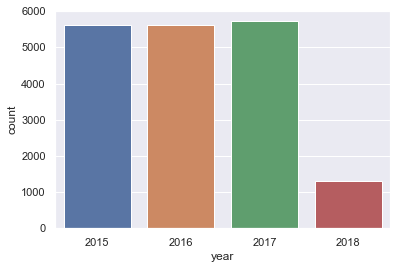

In [12]:
sns.countplot(avocado['year'])

We've avocado data of 4 consecutive years from 2015 to 2018.

In [13]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

We've 2 types of avocados 'Conventional' and 'Organic'.

<AxesSubplot:xlabel='type', ylabel='count'>

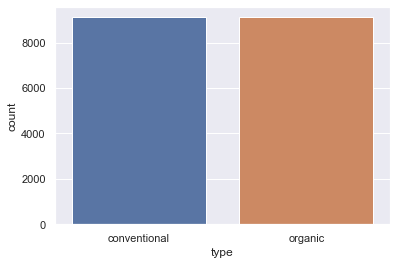

In [14]:
sns.countplot(avocado['type'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

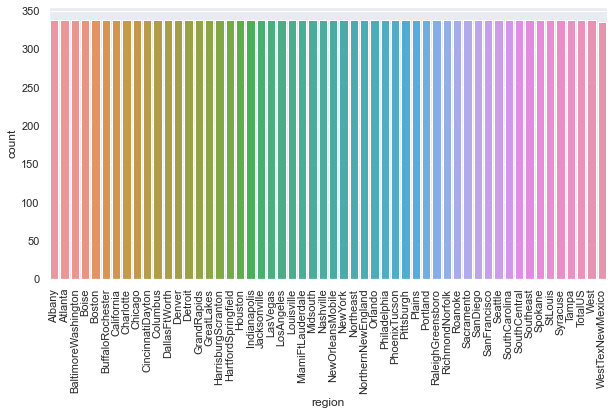

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(avocado['region'])
plt.xticks(rotation = 90)

In [16]:
print("We have all USA states that is : ",avocado['region'].nunique())

We have all USA states that is :  54


##### Time-Date Analysis on date column and seperating day and month in seperate columns. 

In [17]:
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month']=avocado['Date'].apply(lambda x:x.month)
avocado['Day']=avocado['Date'].apply(lambda x:x.day)

In [18]:
avocado.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

#### Bivariate Analysis

Text(0.5, 1.0, 'Average Price')

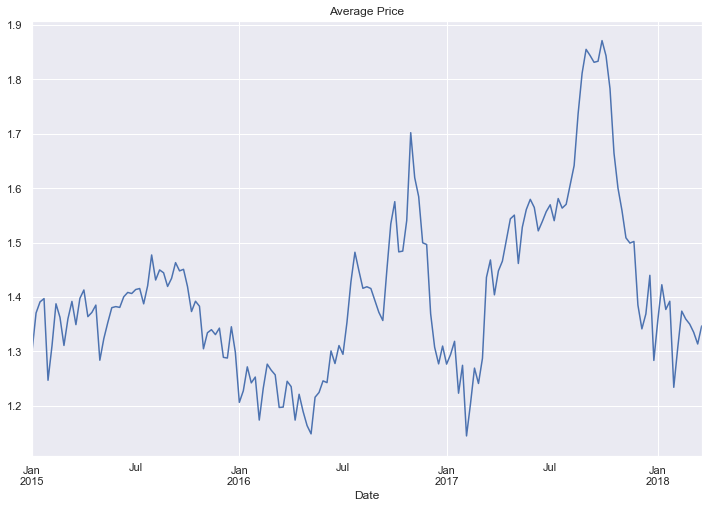

In [19]:
byDate=avocado.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

We can clearly see that 2017 was the year for Avocados. 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

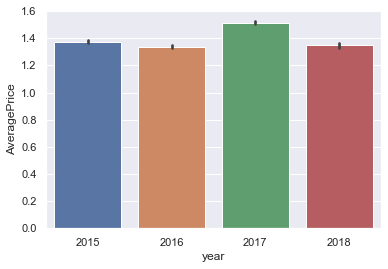

In [20]:
sns.barplot(data = avocado, x = 'year', y = 'AveragePrice')

In year 2017 Avocado Average Prices hiked up the most. 

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

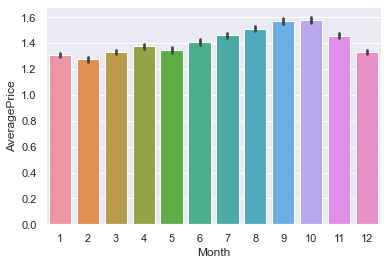

In [21]:
sns.barplot(data = avocado, x = 'Month', y = 'AveragePrice')

Month-wise August - October are peak months for Avocado AveragePrices to hike up. 

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

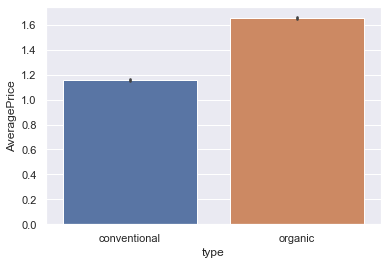

In [22]:
sns.barplot(data = avocado, x = 'type', y = 'AveragePrice')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

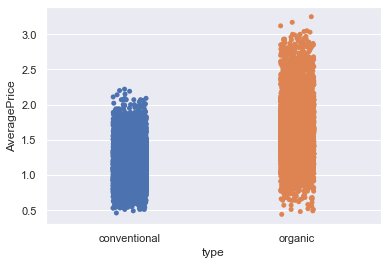

In [23]:
sns.stripplot(data = avocado, y = 'AveragePrice', x = 'type')

Average Price of Organic type avocado's are higher than that of Conventional Avocados.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

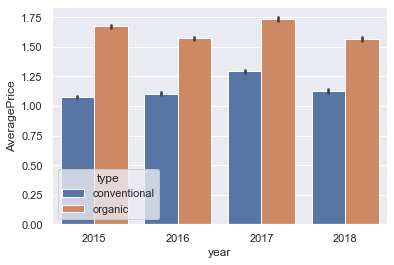

In [24]:
sns.barplot(data = avocado, y = 'AveragePrice', x = 'year', hue = 'type')

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

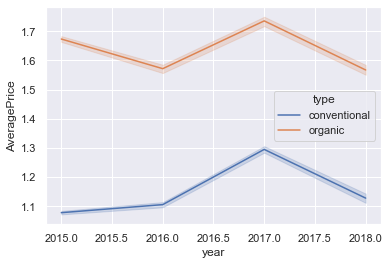

In [25]:
sns.lineplot(data = avocado, y = 'AveragePrice', x = 'year', hue = 'type')

2017 was the year the Average price of both categories of avocados were hiked.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

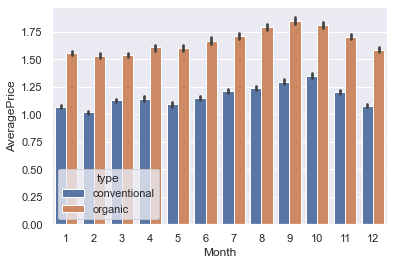

In [26]:
sns.barplot(data = avocado, y = 'AveragePrice', x = 'Month', hue = 'type')

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

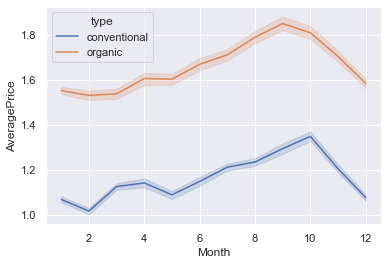

In [27]:
sns.lineplot(data = avocado, y = 'AveragePrice', x = 'Month', hue = 'type')

Month-wise August - October are peak months for Avocado AveragePrices for both categories of Avocados to hike up. 

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

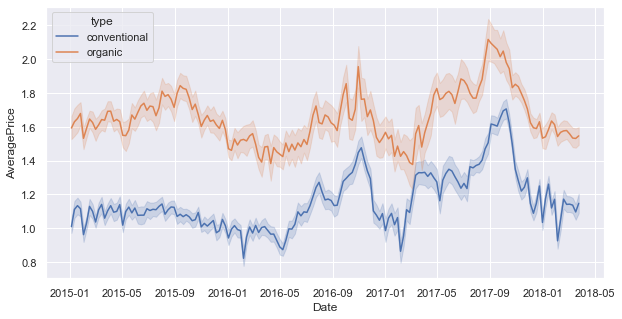

In [28]:
plt.figure(figsize = (10,5))
sns.lineplot(data = avocado, y = 'AveragePrice', x = 'Date', hue = 'type')

- In September of 2017 the Avocado Avg prices were at peak.
- From May - september of 2016 Avocado Avg prices were the lowest.

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

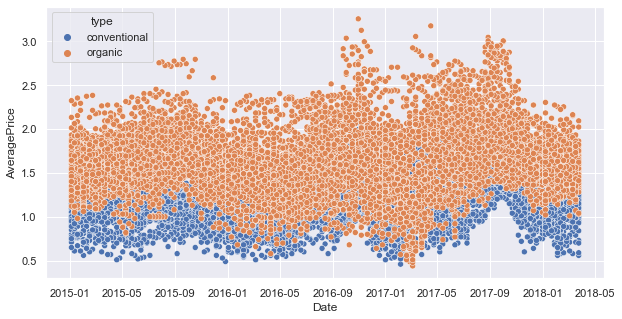

In [29]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = avocado, y = 'AveragePrice', x = 'Date', hue = 'type')

From January to May 2017 was the peak of Avocado Average prices.

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

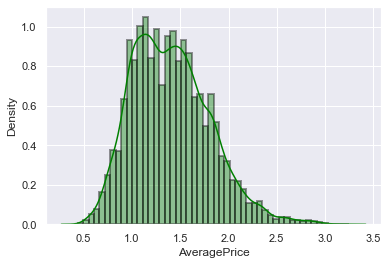

In [30]:
#Analysing Distribution of AveragePrice
sns.distplot(avocado['AveragePrice'], color = 'green',hist_kws=dict(edgecolor="black", linewidth=2))

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

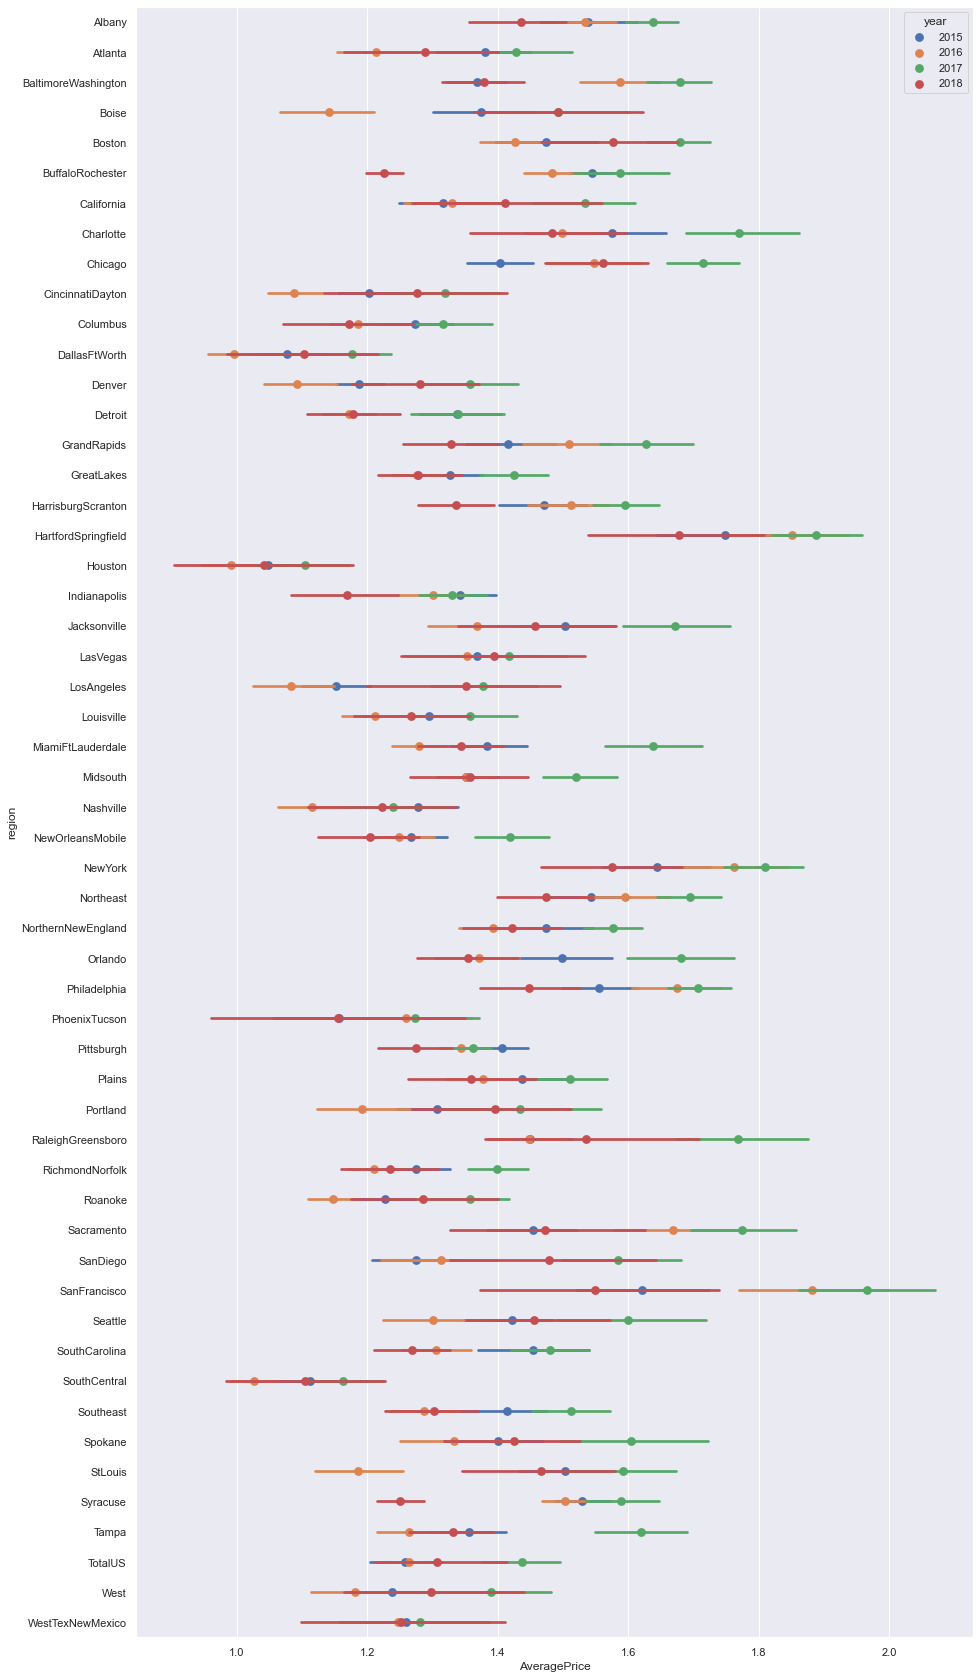

In [31]:
plt.figure(figsize = (15,30))
sns.pointplot(x='AveragePrice',y='region',data=avocado, hue='year',join=False)


- SanFrancisco and HartfordSpringField have seen highest Averageprice for Avocados in 2017.
- Houston, PheonixTuscan and SouthCentral have seen highest Averageprice for Avocados in 2018.

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

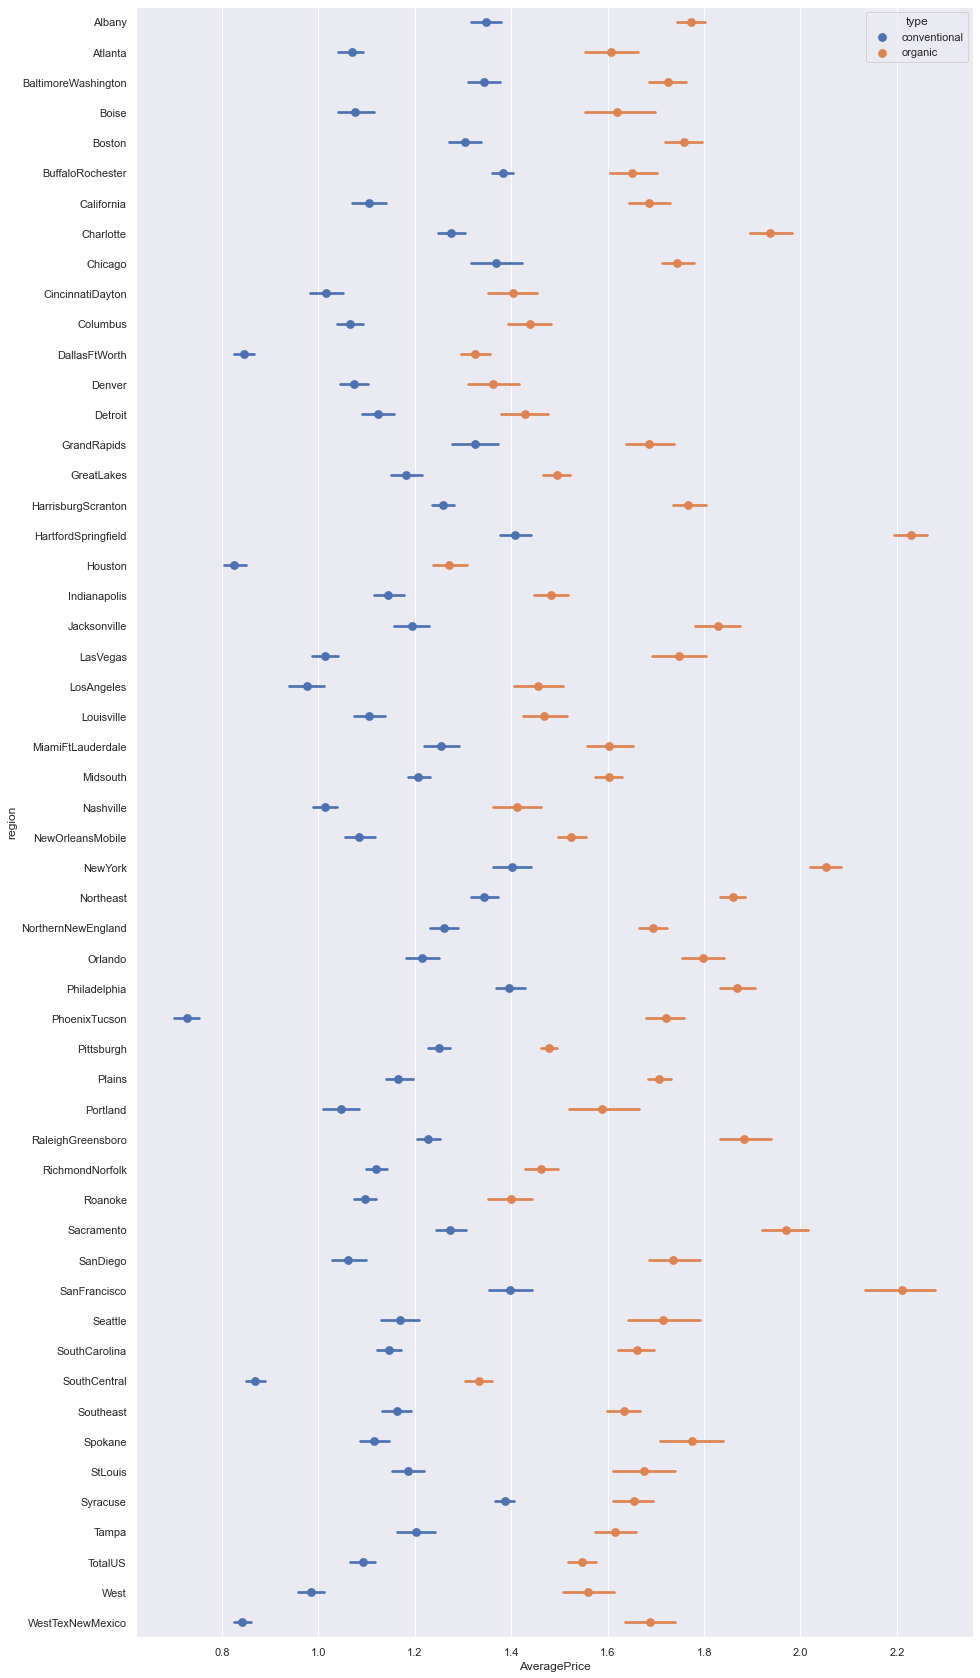

In [32]:
plt.figure(figsize = (15,30))
sns.pointplot(x='AveragePrice',y='region',data=avocado, hue='type',join=False)


- SanFrancisco and HartfordSpringField have highest Averageprice for  Organic Avocados.
- Houston, SouthCentral have lowest Averageprice for Organic Avocados.
- Houston, PheonixTuscan and SouthCentral have highest Averageprice for  Conventional Avocados.
- Houston, PheonixTuscan and DallasFtWorth have lowest Averageprice for  Conventional Avocados.

#### Multivariate Analysis

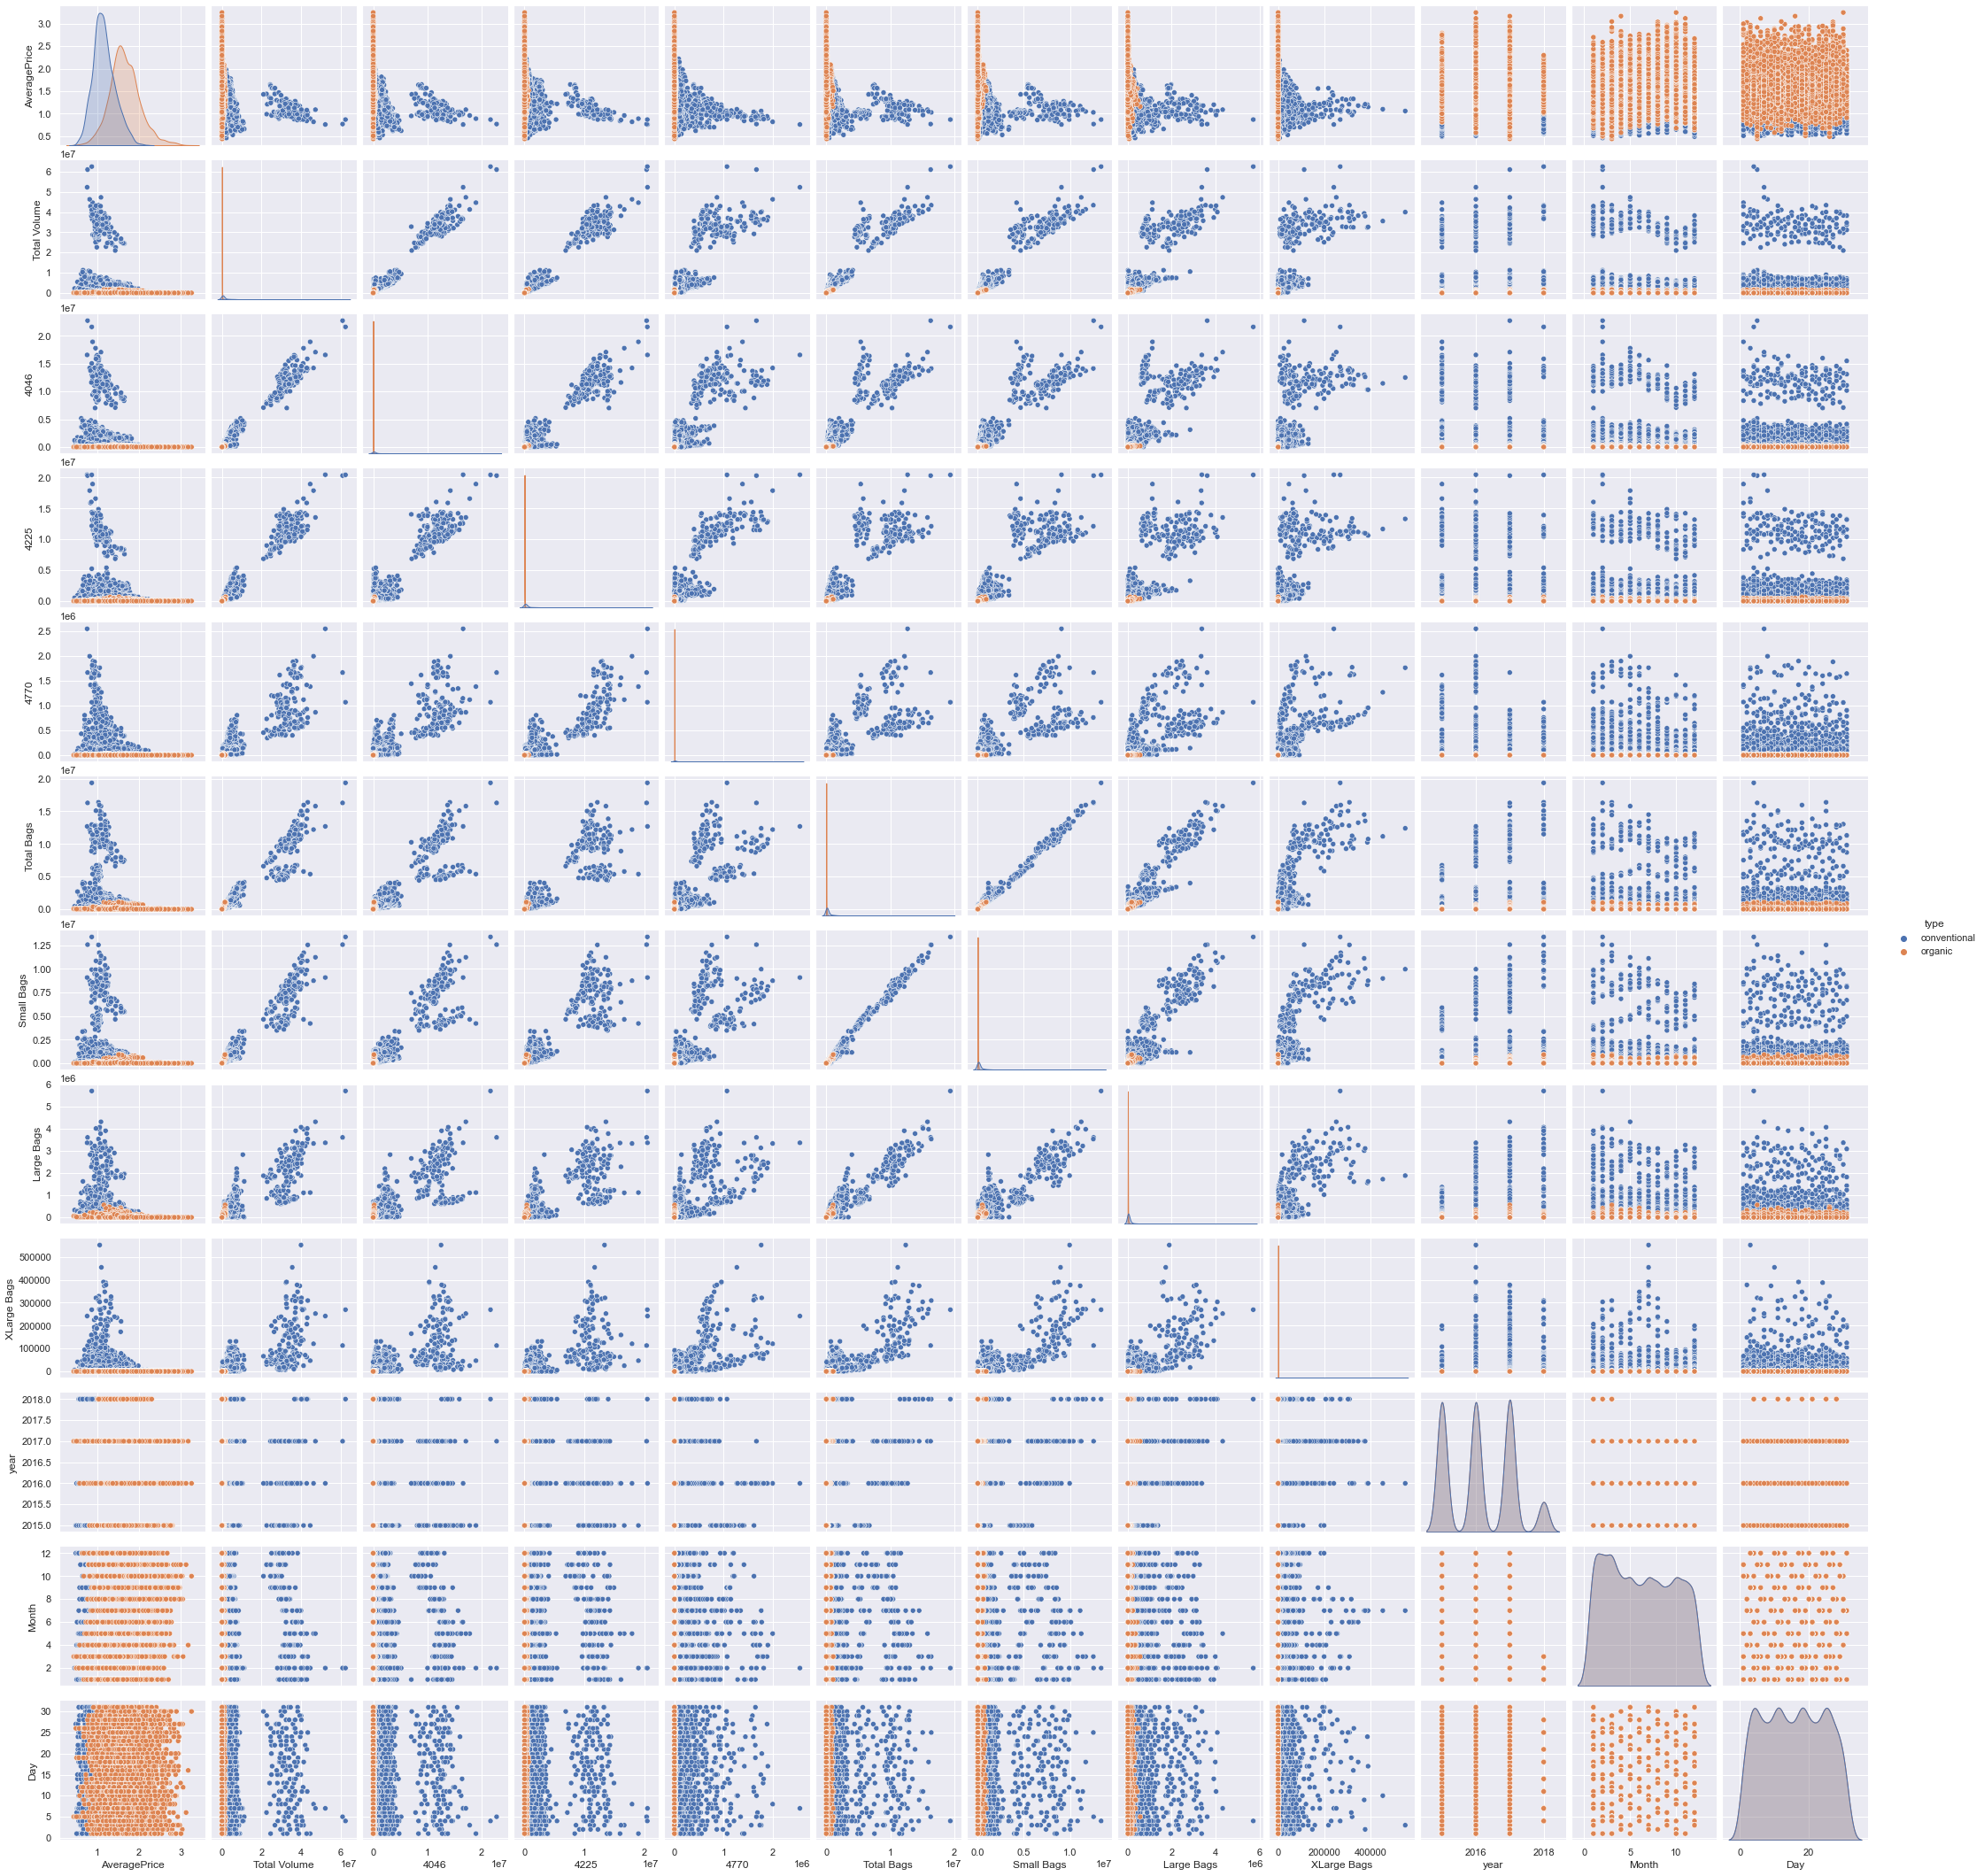

In [33]:
sns.pairplot(avocado, hue ='type')

- Total Bags have positive correlation with Small Bags, Large Bags and XLarge Bags.
- Total Volume have positive correlation with 4046, 4225 and 4770.

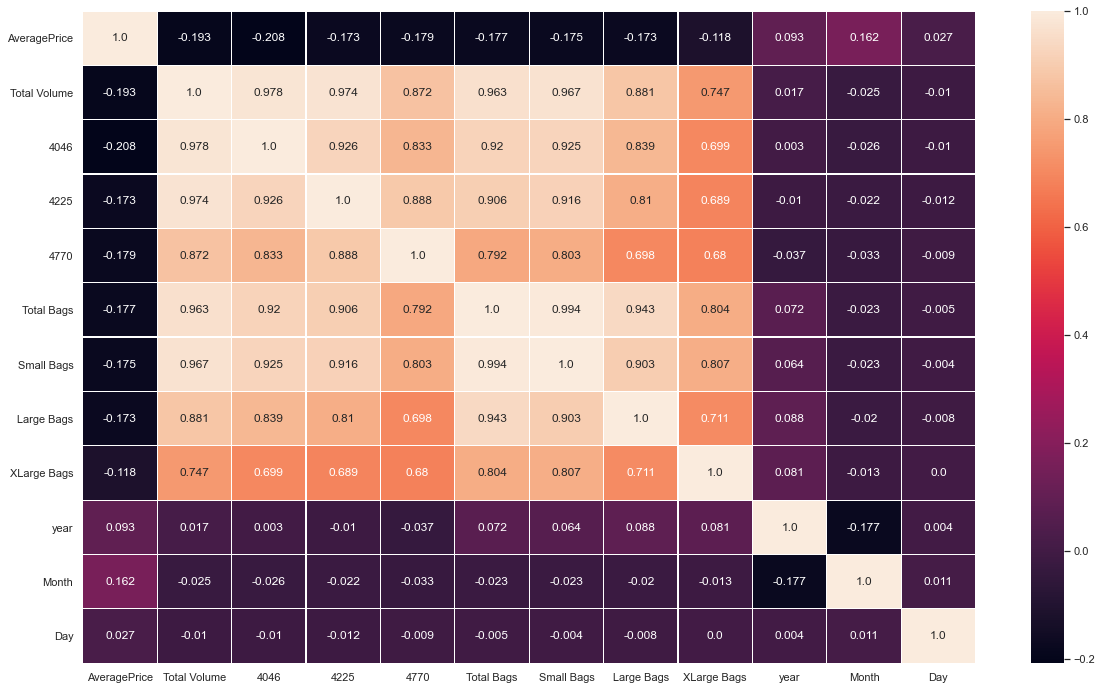

In [34]:
#Checking Correlation among features
plt.figure(figsize = (20,12))
sns.heatmap(round(avocado.corr(),3), annot = True, linewidth = .2 , fmt = '1')
plt.show()

- Total Volume, 4046,4225,4770, Total Bags, Small Bags, Large Bags, XLarge Bags are all highly positively correlated with each other.

### Data Cleaning

AveragePrice       AxesSubplot(0.125,0.749828;0.227941x0.130172)
Total Volume    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
4046            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
4225               AxesSubplot(0.125,0.593621;0.227941x0.130172)
4770            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Total Bags      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Small Bags         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Large Bags      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
XLarge Bags     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
year               AxesSubplot(0.125,0.281207;0.227941x0.130172)
Month           AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Day             AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

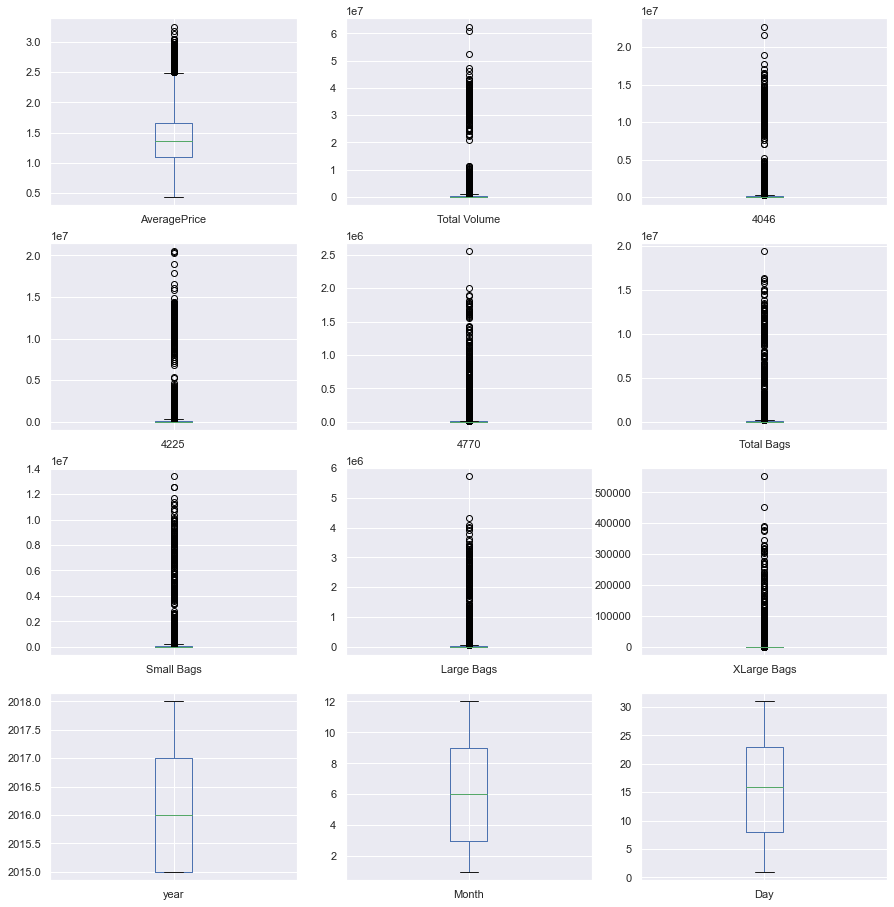

In [35]:
#Plotting Boxplot to analyse skewness 
avocado.plot(kind = 'box', subplots = True, layout = (5,3), figsize = (15,20))

We've high skewness in our Dataset.

In [36]:
#Dropping Date column because we have performed data-time analysis already and dropping region as it doesn't seem relevant.
avocado.drop(columns =['Date','region'],inplace = True)
avocado.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  Month  Day  
0     8603.62       93.25          0.0  conventional  2015     12   27  
1     9408.07       97.49          0.0  conventional  2015     12   20  
2     8042.21      103.14          0.0  conventional  2015     12   13  
3     5677.40      133.76          0.0  conventional  2015     12    6  
4     5986.26      197.69          0.0  conventional  2015     11   29

In [37]:
avocado.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  Month  Day  
0     8603.62       93.25          0.0  conventional  2015     12   27  
1     9408.07       97.49          0.0  conventional  2015     12   20  
2     8042.21      103.14          0.0  conventional  2015     12   13  
3     5677.40      133.76          0.0  conventional  2015     12    6  
4     5986.26      197.69          0.0  conventional  2015     11   29

In [38]:
#Encoding type column 
avocado['type'] = avocado['type'].replace({'conventional':0, 'organic' :1})

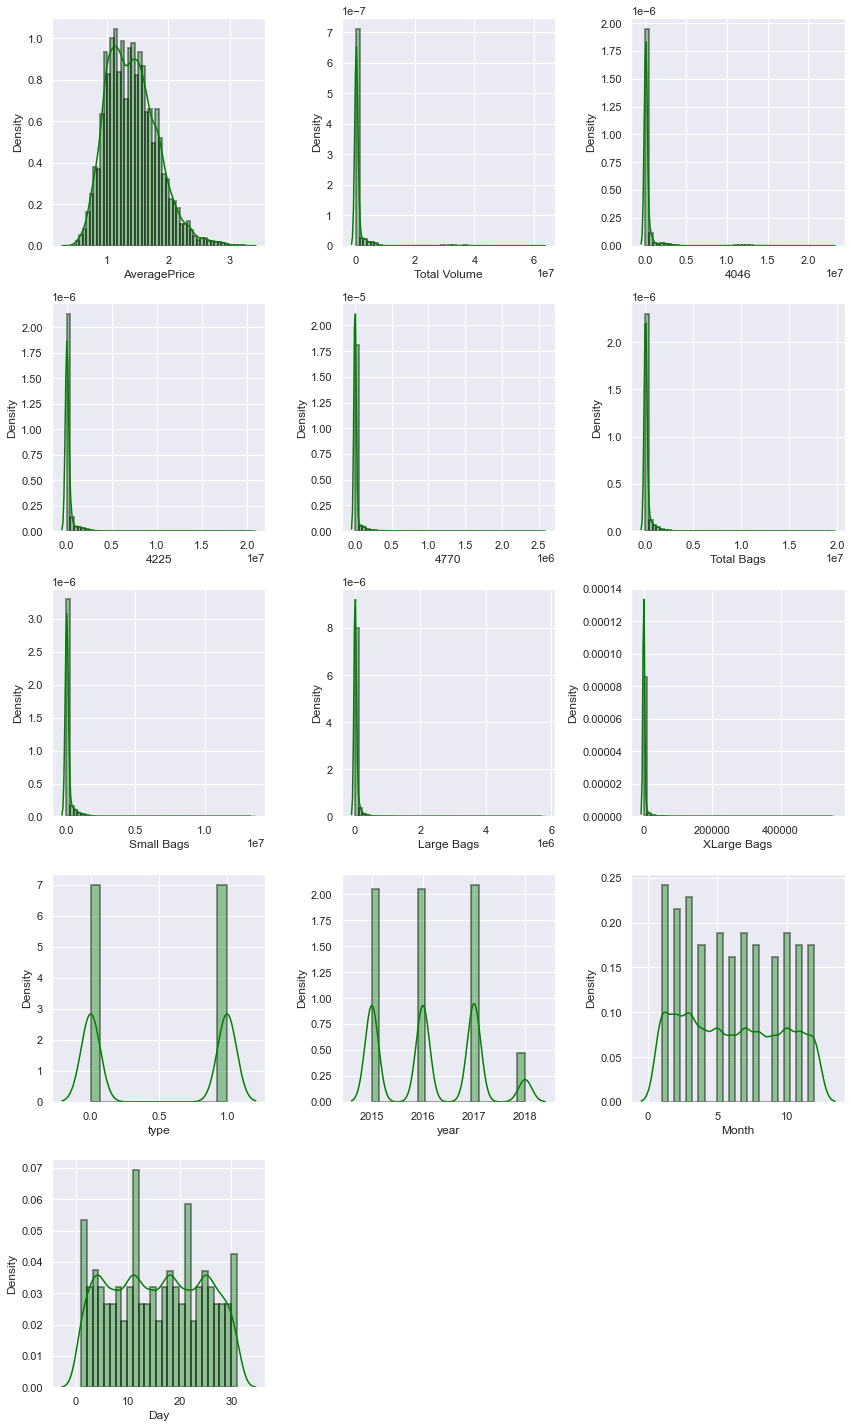

In [39]:
#Multivariate Analysis
#Visualising the distribution of our dataset
plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in avocado:
    if plotnumber<=13: 
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(avocado[column], color = 'green',hist_kws=dict(edgecolor="black", linewidth=2))
    plotnumber+=1
plt.tight_layout()

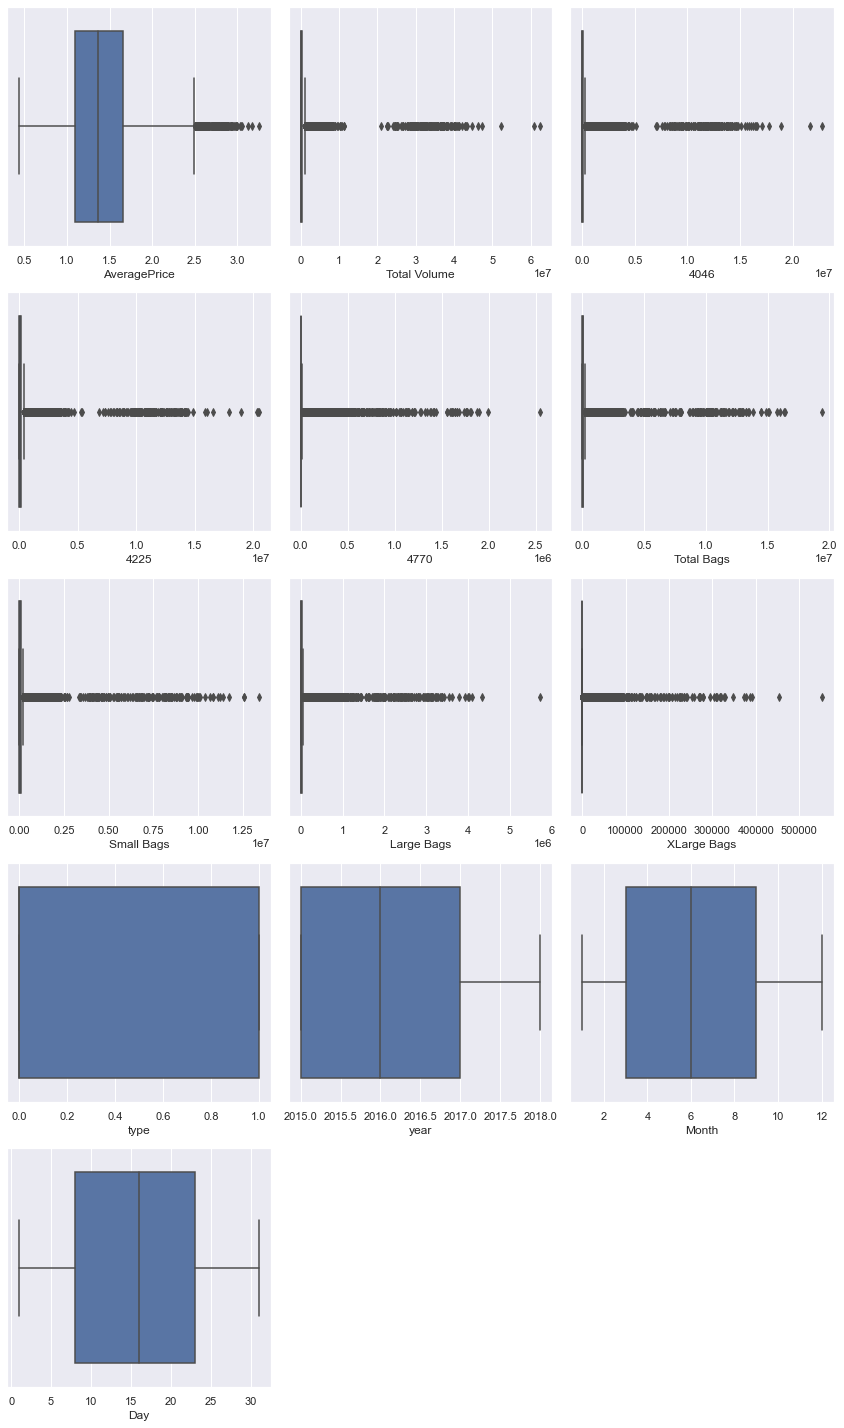

In [40]:
#Multivariate Analysis
#Visualizing outliers using boxplot
plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in avocado:
    if plotnumber<=13: 
        ax = plt.subplot(5,3,plotnumber,)
        sns.boxplot(avocado[column])
    plotnumber+=1
plt.tight_layout()

There is high skewness in almost all our features. Except AveragePrice,type and Date - time features.

In [41]:
#Analysing skewness
avocado.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [42]:
#Splitting Dataset into label and predictors
X = avocado.drop('AveragePrice',axis =1)
y = avocado['AveragePrice']

In [43]:
#Performing powertransformation on our skewed data
pt = PowerTransformer( method = 'yeo-johnson')
X_trans = pd.DataFrame(pt.fit_transform(X),columns = X.columns)

In [44]:
#Checking Skewness after Power Transformation
X_trans.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
Month          -0.146584
Day            -0.208462
dtype: float64

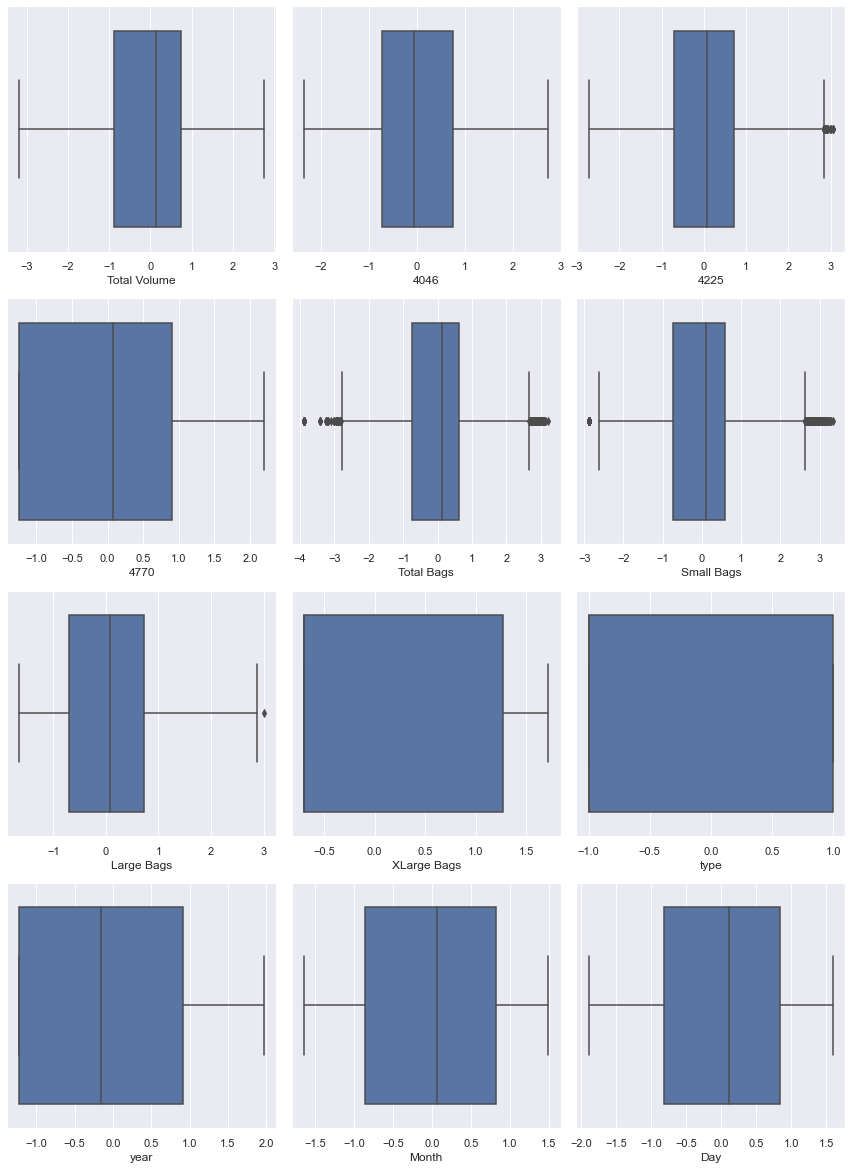

In [45]:
#Multivariate Analysis
#Visualising the outliers after skewness removal
plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in X_trans:
    if plotnumber<=13: 
        ax = plt.subplot(5,3,plotnumber,)
        sns.boxplot(X_trans[column])
        #plt.title('Ediblity over ' + column)
    plotnumber+=1
plt.tight_layout()

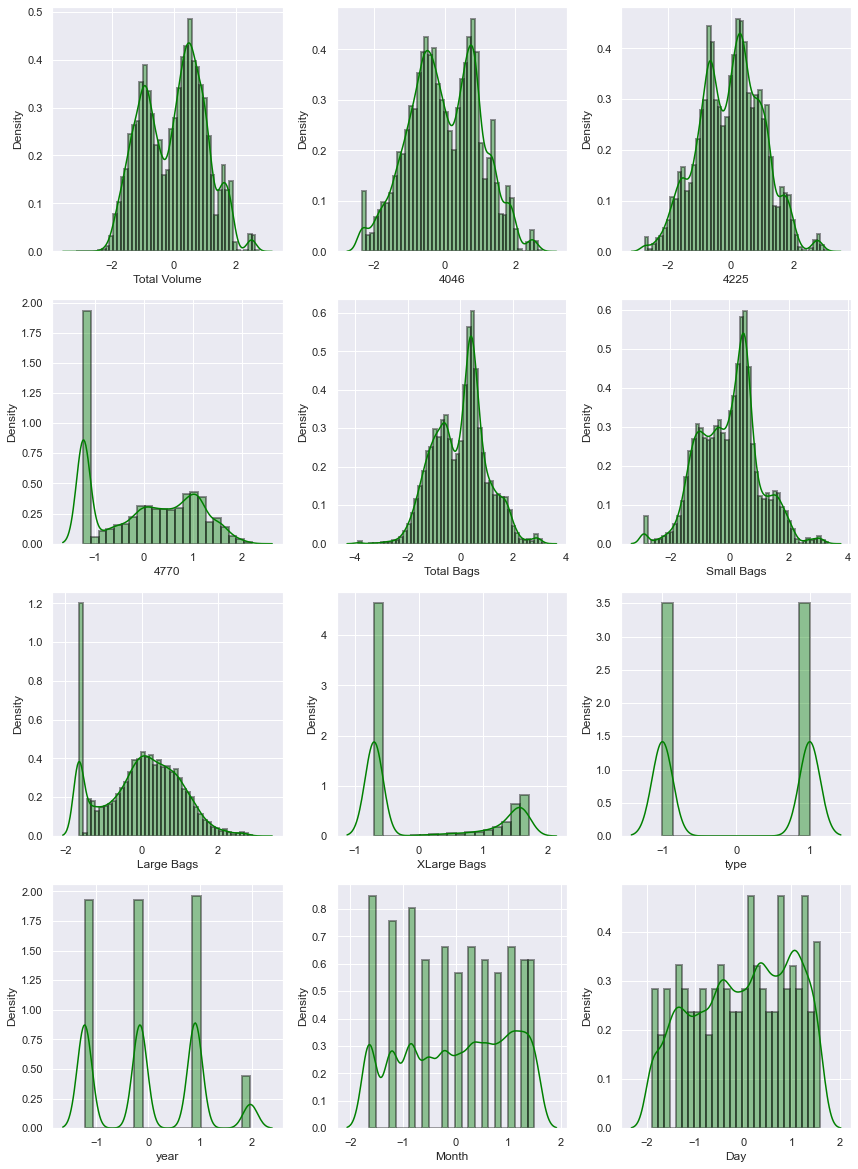

In [46]:
#Multivariate Analysis
#Visualising the distribution after skewness removal

plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in X_trans:
    if plotnumber<=13: 
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(X_trans[column], color = 'green',hist_kws=dict(edgecolor="black", linewidth=2))
        #plt.title('Ediblity over ' + column)
    plotnumber+=1
plt.tight_layout()

### Model Building

In [47]:
#Scaling our feature dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_trans)

In [48]:
#Splitting Dataset into Train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,train_size = 0.8)

### Linear Regression 

In [49]:
#Model instantiating and fitting
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [50]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  56.94 %
Linear Regression Model Confidence on testing set :  56.76 %


In [51]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [52]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  1.4040449373067994 

Features and their corresponding weights:


features  coefficients
0   Total Volume     -0.265325
1           4046      0.018565
2           4225      0.260873
3           4770      0.032848
4     Total Bags     -0.269651
5     Small Bags      0.190532
6     Large Bags     -0.042907
7    XLarge Bags      0.000766
8           type      0.189040
9           year      0.103805
10         Month      0.083661
11           Day      0.007042

In [53]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.5676299649284823
Mean Absolute Error for our Linear Regression Model: 0.21073881362955135
Mean Squared Error for our Linear Regression Model: 0.07369528693625607
Root Mean Squared Error for our Linear Regression Model: 0.2714687586744671


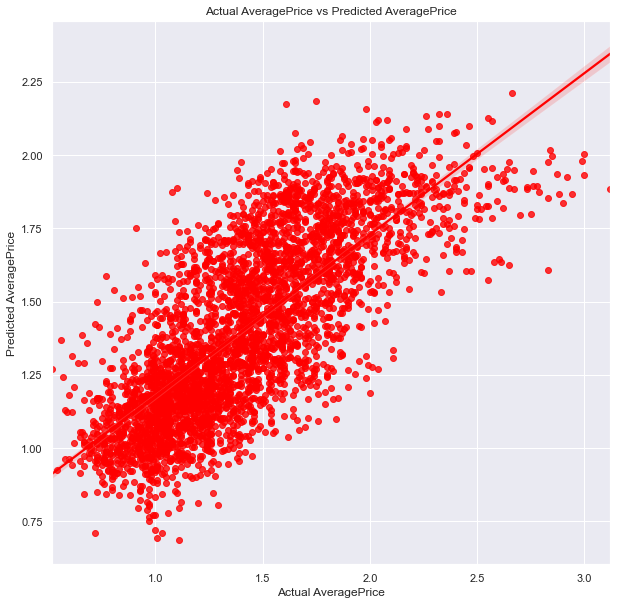

In [54]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X_trans, color = 'red')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice vs Predicted AveragePrice')
plt.show()

### Regularization with Lasso Regression

In [55]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

2.049279075668593e-06

In [56]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=2.049279075668593e-06)

In [57]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  56.8 %


In [58]:
lassopred = lasso_reg.predict(X_test)

In [59]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R2 Score for Tuned Lasso Regression Model: 0.5676262245017527
Mean Absolute Error for our Tuned Lasso Regression Model: 0.2107391700824282
Mean Squared Error for our Tuned Lasso Regression Model: 0.07369592447308503
Root Mean Squared Error for our Lasso Linear Regression Model: 0.2714699329080203


In [60]:
score = cross_val_score(lasso_reg,X_trans,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 17.4 %


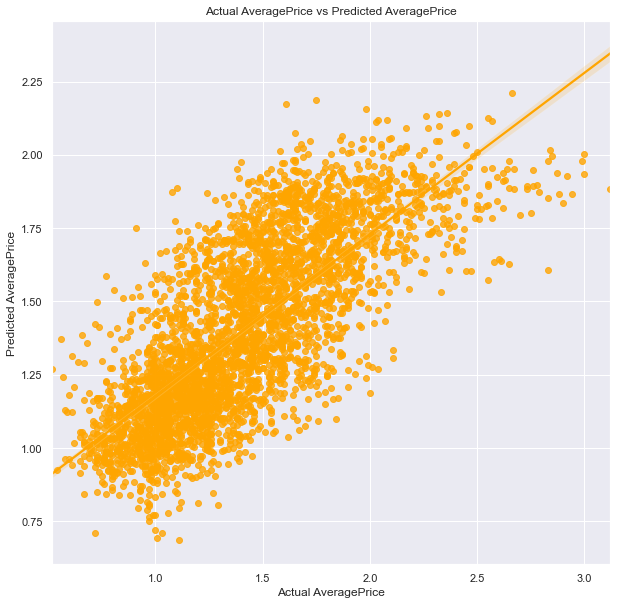

In [61]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=lassopred,data=X, color = 'orange')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice vs Predicted AveragePrice')
plt.show()

Our models are giving us low confidence. This maybe due to less number of predictors which are highly correlated. 

#### Model buidling with dummy predictors

In [62]:
#Loading Dataset
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [63]:
#Removing Unnecessary feature
df.drop('Unnamed: 0',axis =1, inplace = True)

In [64]:
#Applying date-time Analysis
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [65]:
#Dropping Date Column
df.drop('Date',axis = 1,inplace =True)

In [66]:
#Getting dummy variables for all the categorical features in our dataset
df1 = pd.get_dummies(df)
print("Shape of new Dataset is",df1.shape)

Shape of new Dataset is (18249, 68)


In [67]:
df1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  year  ...  region_SouthCarolina  \
0     8603.62       93.25          0.0  2015  ...                     0   
1     9408.07       97.49          0.0  2015  ...                     0   
2     8042.21      103.14          0.0  2015  ...                     0   
3     5677.40      133.76          0.0  2015  ...                     0   
4     5986.26      197.69          0.0  2015  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                    0                 0               0               0   
1                    0                 0               0               0   
2                    0                 0               0               0   
3                    0                 0               0               0   
4                    0                 0               0               0   

   region_Syracuse  region_Tampa  region_TotalUS  region_West  \
0                0             0               0            0   
1                0             0               0            0   
2                0             0               0            0   
3                0             0               0            0   
4                0             0               0            0   

   region_WestTexNewMexico  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 68 columns]

### Preparing Data for model building

In [68]:
#Splitting Dataset into label and Features
X = df1.drop('AveragePrice', axis = 1)
y = df1['AveragePrice']

In [69]:
#Splitting Dataset into training and testing data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

### Linear Regression

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lrpred = lr.predict(X_test)

In [71]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lr.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lr.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  58.64 %
Linear Regression Model Confidence on testing set :  60.43 %


In [72]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lr.intercept_,'\n')
weights = zip(X.columns,lr.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  -113.427917597872 

Features and their corresponding weights:


features  coefficients
0              Total Volume     -0.000045
1                      4046      0.000045
2                      4225      0.000045
3                      4770      0.000045
4                Total Bags     -0.041979
..                      ...           ...
62          region_Syracuse      0.113355
63             region_Tampa     -0.006839
64           region_TotalUS     -0.029705
65              region_West     -0.105191
66  region_WestTexNewMexico     -0.149352

[67 rows x 2 columns]

In [73]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,lrpred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,lrpred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,lrpred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lrpred)))

R squared for our Linear Regression Model: 0.60428489202818
Mean Absolute Error for our Linear Regression Model: 0.19276389886597695
Mean Squared Error for our Linear Regression Model: 0.06478061843158514
Root Mean Squared Error for our Linear Regression Model: 0.25452036938442696


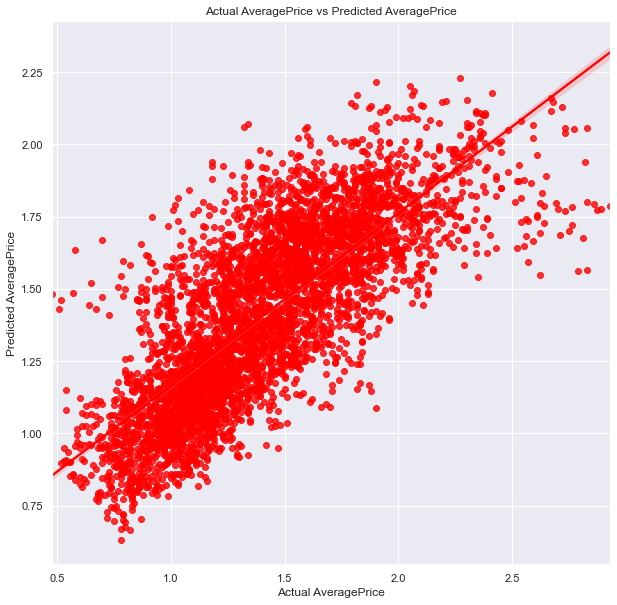

In [74]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=lrpred,data=df1, color = 'red')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice vs Predicted AveragePrice')
plt.show()

### Decision Tree Regressor

In [75]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [76]:
prd = dt.predict(X_test)
r2_score(y_test,prd)

0.7922931166067844

In [77]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,prd))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,prd))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,prd))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,prd)))

R squared for our Linear Regression Model: 0.7922931166067844
Mean Absolute Error for our Linear Regression Model: 0.12162393162393163
Mean Squared Error for our Linear Regression Model: 0.03400269559500329
Root Mean Squared Error for our Linear Regression Model: 0.18439819845921296


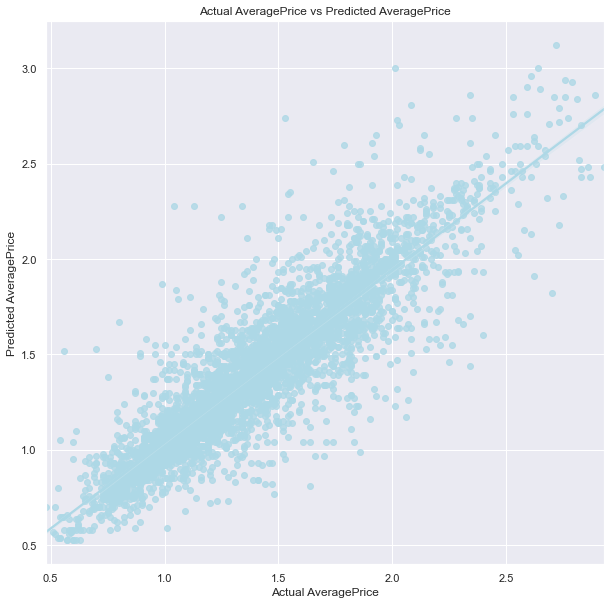

In [78]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=prd,data=df1, color = 'lightblue')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice vs Predicted AveragePrice')
plt.show()

### Random Forest Regressor

In [79]:
# Model Instantiating and fitting
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
r2_score(y_test,pred)

0.8989594184666765

In [80]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.8989594184666765
Mean Absolute Error for our Random Forest Regressor Model: 0.09040795529257066
Mean Squared Error for our Random Forest Regressor Model: 0.016540867979399517
Root Mean Squared Error for our Random Forest Regressor Model: 0.128611305799294


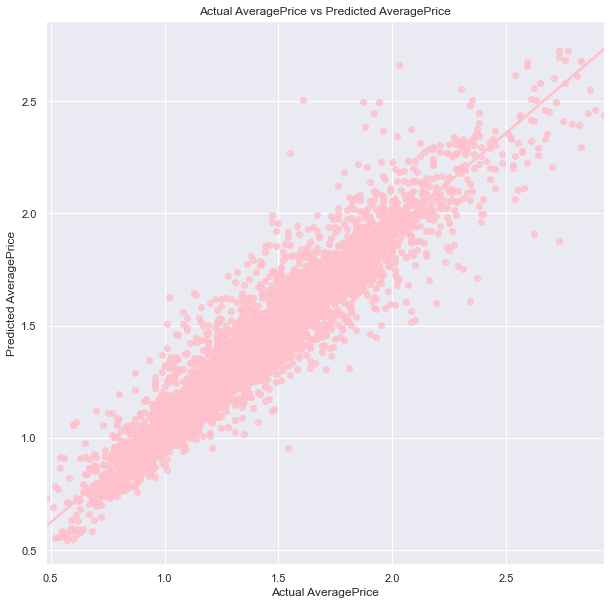

In [81]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=pred,data=df1, color = 'pink')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice vs Predicted AveragePrice')
plt.show()

### Regularization using Ridge CV

In [82]:
#Ridge will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas= np.arange(0.001,0.2,0.001),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.136, 0.137, 0.138, 0.139, 0.14 , 0.141, 0.142, 0.143, 0.144,
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199]),
        normalize=True)

In [83]:
ridgecv.alpha_

0.005

In [84]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.005)

In [85]:
ridge_model.score(X_test,y_test)

0.6042899139235596

In [86]:
ridge_model.score(X_test,y_test)

0.6042899139235596

In [87]:
ridgepred = ridge_model.predict(X_test)

In [88]:
#Applying Evaluation metrics to our Tuned Ridge Regression model
print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,ridgepred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,ridgepred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,ridgepred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,ridgepred)))

R2 Score for Tuned Ridge Regression Model: 0.6042899139235596
Mean Absolute Error for our Tuned Ridge Regression Model: 0.1927606898176355
Mean Squared Error for our Tuned Ridge Regression Model: 0.06477979632122889
Root Mean Squared Error for our Ridge Linear Regression Model: 0.2545187543605164


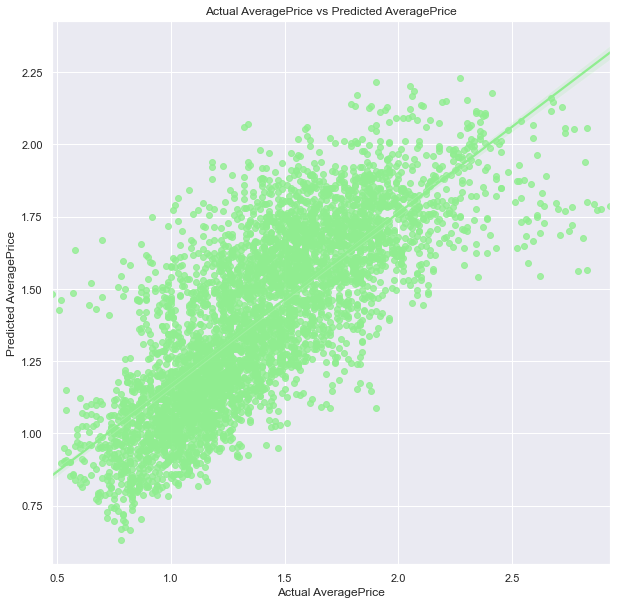

In [89]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=ridgepred,data=df1, color = 'lightgreen')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice vs Predicted AveragePrice')
plt.show()

### OLS Model using Stats Model

In [90]:
lm1 = smf.ols(formula = 'y ~ X',data = avocado).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     404.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:19:54   Log-Likelihood:                -1129.3
No. Observations:               18249   AIC:                             2391.
Df Residuals:                   18183   BIC:                             2906.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.8990      2.812    -25.214      0.000     -76.411     -65.387
X[0]       -2.678e-05   3.98e-05     -0.672      0.501      -0.000    5.13e-05
X[1]        2.679e-05   3.98e-05      0.673      0.501   -5.13e-05       0.000
X[2]        2.677e-05   3.98e-05      0.672      0.502   -5.13e-05       0.000
X[3]        2.678e-05   3.98e-05      0.672      0.501   -5.13e-05       0.000
X[4]          -0.0305      0.030     -1.023      0.306      -0.089       0.028
X[5]           0.0305      0.030      1.024      0.306      -0.028       0.089
X[6]           0.0305      0.030      1.024      0.306      -0.028       0.089
X[7]           0.0305      0.030      1.024      0.306      -0.028       0.089
X[8]           0.0540      0.002     25.513      0.000       0.050       0.058
X[9]           0.0210      0.001     38.073      0.000       0.020       0.022
X[10]          0.0011      0.000      5.125      0.000       0.001       0.002
X[11]        -35.6955      1.406    -25.389      0.000     -38.451     -32.940
X[12]        -35.2035      1.406    -25.039      0.000     -37.959     -32.448
X[13]         -1.1605      0.054    -21.517      0.000      -1.266      -1.055
X[14]         -1.3831      0.054    -25.662      0.000      -1.489      -1.277
X[15]         -1.1841      0.054    -21.948      0.000      -1.290      -1.078
X[16]         -1.3734      0.054    -25.466      0.000      -1.479      -1.268
X[17]         -1.1875      0.054    -22.012      0.000      -1.293      -1.082
X[18]         -1.2044      0.054    -22.341      0.000      -1.310      -1.099
X[19]         -1.3338      0.054    -24.608      0.000      -1.440      -1.228
X[20]         -1.1152      0.054    -20.674      0.000      -1.221      -1.009
X[21]         -1.1629      0.054    -21.487      0.000      -1.269      -1.057
X[22]         -1.5099      0.054    -28.024      0.000      -1.616      -1.404
X[23]         -1.4695      0.054    -27.249      0.000      -1.575      -1.364
X[24]         -1.6365      0.054    -30.320      0.000      -1.742      -1.531
X[25]         -1.4939      0.054    -27.746      0.000      -1.599      -1.388
X[26]         -1.4507      0.054    -26.902      0.000      -1.556      -1.345
X[27]         -1.2191      0.054    -22.603      0.000      -1.325      -1.113
X[28]         -1.3856      0.054    -25.609      0.000      -1.492      -1.280
X[29]         -1.2082      0.054    -22.407      0.000      -1.314      -1.103
X[30]         -0.9015      0.054    -16.716      0.000      -1.007      -0.796
X[31]         -1.6716      0.054    -30.987      0.000      -1.777      -1.566
X[32]         -1.4071      0.054    -26.106      0.000      -1.513      -1.301
X[33]         -1.2104      0.054    -22.449      0.000      -1.316      -1.105
X[34]         -1.3388      0.054    -24.834      0.000      -1.444      -1.233
X[

#### Conclusion : According to our r2_score our Random Forest Regressor is the best model with:
- r2_score(0.8989),
- MSE(0.0904)  
- MAE(0.0165) 

### Hyperparameter Tuning of Random Forest Regressor

In [91]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [92]:
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0)

In [93]:
g_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [94]:
g_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 15}

In [95]:
model = RandomForestRegressor(bootstrap = True, max_depth = None, max_features = 'auto',n_estimators = 15)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15)

In [96]:
pred = rf.predict(X_test)

In [97]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.8989594184666765
Mean Absolute Error for our Random Forest Regressor Model: 0.09040795529257066
Mean Squared Error for our Random Forest Regressor Model: 0.016540867979399517
Root Mean Squared Error for our Random Forest Regressor Model: 0.128611305799294


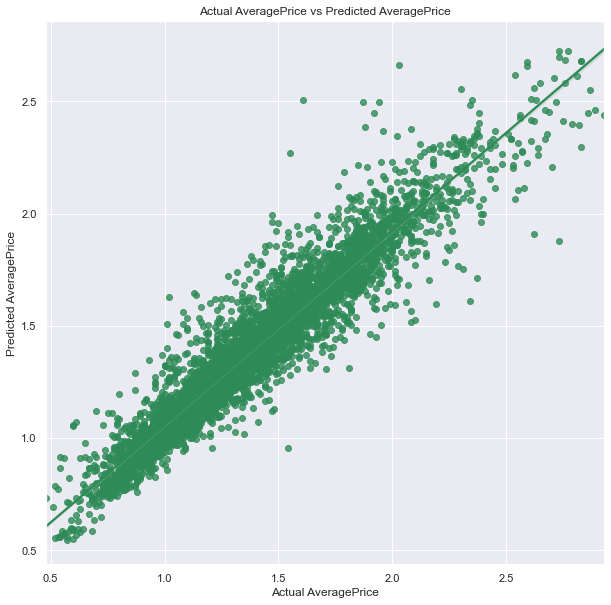

In [98]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=pred,data=df1, color = 'seagreen')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual AveragePrice vs Predicted AveragePrice')
plt.show()

Our Tuned Random Forest Regressor have hardly any difference in r2_score.

### Saving our Model

In [99]:
joblib.dump(model,"AvocadoAveragePricePredictions.pkl")

['AvocadoAveragePricePredictions.pkl']

### Loading Our Model

In [100]:
model = joblib.load("AvocadoAveragePricePredictions.pkl")

In [101]:
#predicting test data using loaded model
prediction = model.predict(X_test)
prediction

array([1.298     , 1.71666667, 1.73866667, ..., 1.11733333, 1.26533333,
       2.02666667])

In [102]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

Predicted  Actual
0      1.298000    1.33
1      1.716667    1.35
2      1.738667    0.93
3      1.608667    1.08
4      1.315333    1.28
...         ...     ...
4558   1.335333    0.62
4559   1.439333    0.54
4560   1.117333    0.61
4561   1.265333    0.56
4562   2.026667    0.61

[4563 rows x 2 columns]

In [103]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)